<a href="https://colab.research.google.com/github/OPzinn/lia1_2024_2/blob/main/Entregas%20-%20Jo%C3%A3o%20Septimio%20Zeferino/Construindo_um_modelo_com_TensorFlow_Dogs%26Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bazinga1337","key":"345dee98958c76c7e88dba0b5c397dd2"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:43<00:00, 22.9MB/s]
100% 812M/812M [00:43<00:00, 19.6MB/s]


In [ ]:
! mkdir caesegatos

In [ ]:
! unzip dogs-vs-cats.zip -d caesegatos

Archive:  dogs-vs-cats.zip
  inflating: caesegatos/sampleSubmission.csv  
  inflating: caesegatos/test1.zip    
  inflating: caesegatos/train.zip    


In [ ]:
! unzip caesegatos/test1.zip -d caesegatos/test1

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: caesegatos/test1/test1/5499.jpg  
  inflating: caesegatos/test1/test1/55.jpg  
  inflating: caesegatos/test1/test1/550.jpg  
  inflating: caesegatos/test1/test1/5500.jpg  
  inflating: caesegatos/test1/test1/5501.jpg  
  inflating: caesegatos/test1/test1/5502.jpg  
  inflating: caesegatos/test1/test1/5503.jpg  
  inflating: caesegatos/test1/test1/5504.jpg  
  inflating: caesegatos/test1/test1/5505.jpg  
  inflating: caesegatos/test1/test1/5506.jpg  
  inflating: caesegatos/test1/test1/5507.jpg  
  inflating: caesegatos/test1/test1/5508.jpg  
  inflating: caesegatos/test1/test1/5509.jpg  
  inflating: caesegatos/test1/test1/551.jpg  
  inflating: caesegatos/test1/test1/5510.jpg  
  inflating: caesegatos/test1/test1/5511.jpg  
  inflating: caesegatos/test1/test1/5512.jpg  
  inflating: caesegatos/test1/test1/5513.jpg  
  inflating: caesegatos/test1/test1/5514.jpg  
  inflating: caesegatos/test1/test1/5515.jpg  
  inf

In [ ]:
! mkdir caesegatos/train

In [ ]:
! unzip caesegatos/train.zip -d caesegatos/train

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: caesegatos/train/train/dog.5499.jpg  
  inflating: caesegatos/train/train/dog.55.jpg  
  inflating: caesegatos/train/train/dog.550.jpg  
  inflating: caesegatos/train/train/dog.5500.jpg  
  inflating: caesegatos/train/train/dog.5501.jpg  
  inflating: caesegatos/train/train/dog.5502.jpg  
  inflating: caesegatos/train/train/dog.5503.jpg  
  inflating: caesegatos/train/train/dog.5504.jpg  
  inflating: caesegatos/train/train/dog.5505.jpg  
  inflating: caesegatos/train/train/dog.5506.jpg  
  inflating: caesegatos/train/train/dog.5507.jpg  
  inflating: caesegatos/train/train/dog.5508.jpg  
  inflating: caesegatos/train/train/dog.5509.jpg  
  inflating: caesegatos/train/train/dog.551.jpg  
  inflating: caesegatos/train/train/dog.5510.jpg  
  inflating: caesegatos/train/train/dog.5511.jpg  
  inflating: caesegatos/train/train/dog.5512.jpg  
  inflating: caesegatos/train/train/dog.5513.jpg  
  inflating: caesegatos/tra

In [ ]:
import os
import shutil

# Define the source and destination directories
train_dir = '/content/caesegatos/train/train'  # Your training data directory
cat_dir = os.path.join(train_dir, 'cat')  # Destination directory for cat images
dog_dir = os.path.join(train_dir, 'dog')  # Destination directory for dog images

# Create the destination directories if they don't exist
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Iterate through files in the training directory
for filename in os.listdir(train_dir):
    if filename.startswith('cat') and filename.endswith('.jpg'):
        shutil.move(os.path.join(train_dir, filename), cat_dir)  # Move cat images
    elif filename.startswith('dog') and filename.endswith('.jpg'):
        shutil.move(os.path.join(train_dir, filename), dog_dir)  # Move dog images

**Carregando os dados de Treino e Teste**

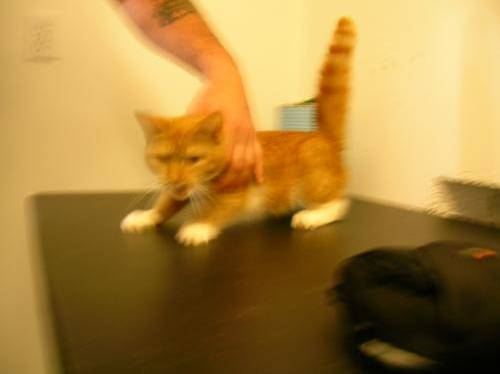

In [ ]:
from IPython.display import Image
Image(filename = '/content/caesegatos/train/train/cat/cat.0.jpg')

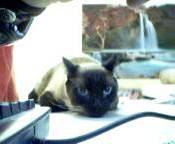

In [ ]:
Image(filename = '/content/caesegatos/train/train/cat/cat.5.jpg')

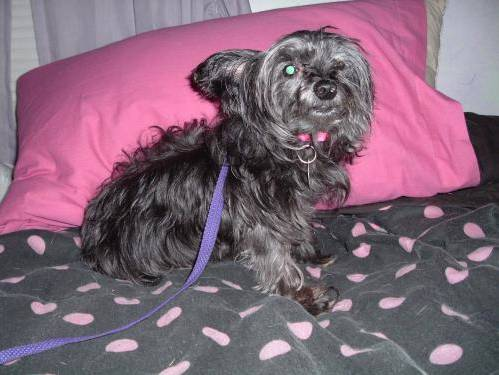

In [ ]:
Image(filename = '/content/caesegatos/train/train/dog/dog.0.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [ ]:
import tensorflow as tf

In [ ]:
import keras as K

In [ ]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [ ]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/caesegatos/train/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 25000 images belonging to 2 classes.


**Treinamento do Modelo**

In [ ]:
# Executando o treinamento
classifier.fit(training_set,
               steps_per_epoch=5,
               epochs=25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.4985 - loss: 0.8368
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.5411 - loss: 0.7004
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.5149 - loss: 0.6895
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.5341 - loss: 0.6900
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.4302 - loss: 0.7033
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4102 - loss: 0.7013
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4939 - loss: 0.6916
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5753 - loss: 0.6870
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4635 - loss: 0.7045
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5105 - loss: 0.6874
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4161 - loss: 0.7086
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5163 - loss: 0.6916
Epoch 13

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


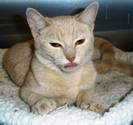

In [ ]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/caesegatos/test1/test1/256.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/caesegatos/test1/test1/256.jpg')


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

**Melhorias adicionais para este modelo:**

*   Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
*   aumentar o redimensionamento da imagem de 64x64 para 256x256.
*   Aumentar o tamanho do lote de 32 para 64.
*   Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*   Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*   Experimentar outros algoritmos de otimização.








Fim! 🔥